# EDA

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from fitter import Fitter
import numpy as np
from pprint import pprint
from functions import (
    read_data,
    add_time_differences,
    add_energy,
    reorder_columns,
    scatter_plot,
    plot_histogram,
    best_distributions,
    print_fit,
)

In [2]:
data_1 = read_data("data/out_1.csv")
data_1["zone"] = 1
data_2 = read_data("data/out_2.csv")
data_2["zone"] = 2
# join the two dataframes and sort by date
df = pd.concat([data_1, data_2]).sort_values(by=["date"])

In [3]:
# summarize the data
print(df.describe())

                      date            m          v        zone
count                  100   100.000000  100.00000  100.000000
mean   2019-02-12 12:26:24   459.230000   18.06900    1.320000
min    2019-01-01 09:00:00     0.000000    3.60000    1.000000
25%    2019-01-21 07:45:00    76.750000    8.37500    1.000000
50%    2019-02-13 11:00:00   232.000000   10.05000    1.000000
75%    2019-03-07 11:00:00   509.750000   32.52500    2.000000
max    2019-03-28 01:00:00  3104.000000   46.50000    2.000000
std                    NaN   626.671742   14.02409    0.468826


## NAs, Zeros and Empty Strings

In [4]:
na_count = df.isna().sum()
zero_count = (df == 0).sum()
empty_string_count = (df == "").sum()

print("Number of NAs in each column:")
print(na_count)
print("\nNumber of zeros in each column:")
print(zero_count)
print("\nNumber of empty strings in each column:")
print(empty_string_count)

Number of NAs in each column:
date    0
m       0
v       0
zone    0
dtype: int64

Number of zeros in each column:
date    0
m       1
v       0
zone    0
dtype: int64

Number of empty strings in each column:
date    0
m       0
v       0
zone    0
dtype: int64


In [5]:
# summarize column 'm' for each zone
print("\n", df.groupby("zone")["m"].describe())

# replace zeros with median of the same zone
df["m"] = df.groupby("zone")["m"].transform(lambda x: x.replace(0, x.median()))

# summarize column 'm' for each zone
print("\n", df.groupby("zone")["m"].describe())


       count        mean         std   min     25%    50%    75%     max
zone                                                                   
1      68.0  628.632353  695.884703  12.0  214.75  402.5  773.0  3104.0
2      32.0   99.250000  104.072555   0.0   36.75   58.0  140.0   406.0

       count        mean         std   min     25%    50%    75%     max
zone                                                                   
1      68.0  628.632353  695.884703  12.0  214.75  402.5  773.0  3104.0
2      32.0  101.062500  102.785382   3.0   37.75   58.0  140.0   406.0


## Time Differences and Energy

In [6]:
# Add time differences and energy to the dataframes and reorder the columns.
# Also convert the zone column to a categorical variable.
# This is done so that the zone column is not used as a numerical variable.
df = reorder_columns(add_energy(add_time_differences(df)))
df["zone"] = df["zone"].astype("category")

## Write data to disk

In [7]:
# Save the zones into seperate files, so they can be compared to the original files.
df.to_csv("data/data.csv", index=False)

## Visualization
### Scatter

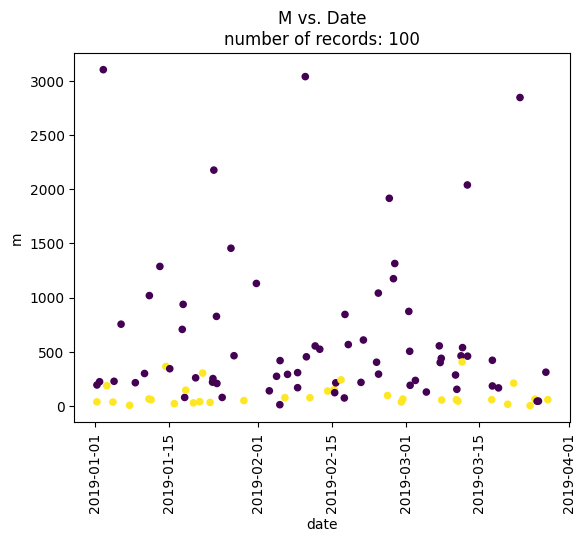

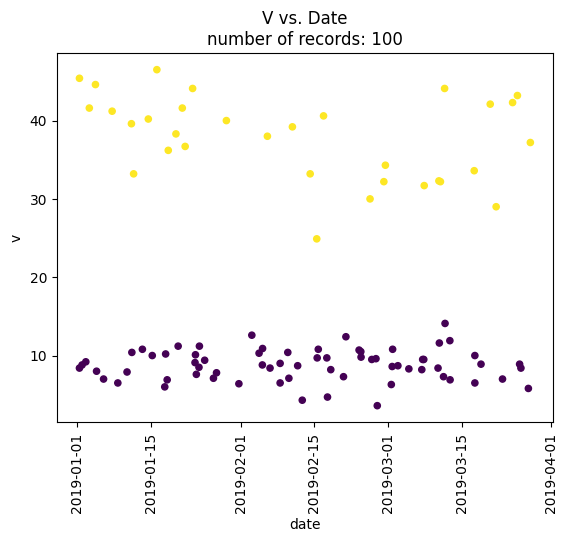

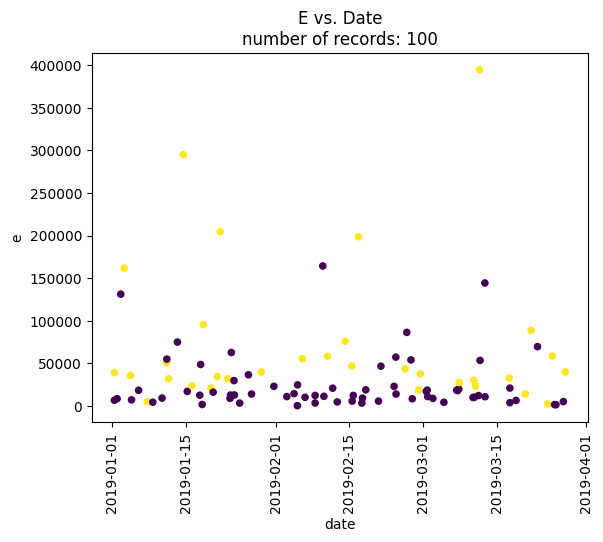

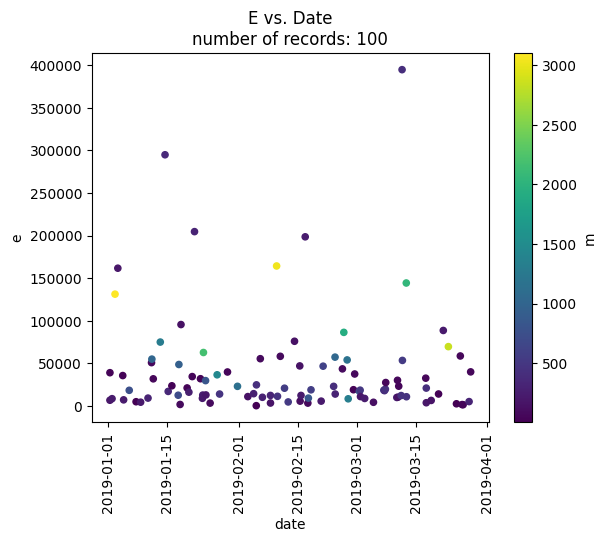

In [8]:
for col in ["m", "v", "e"]:
    scatter_plot(df, col)
scatter_plot(df, "e", c="m", colorbar=True)
plt.show()

### Histogram

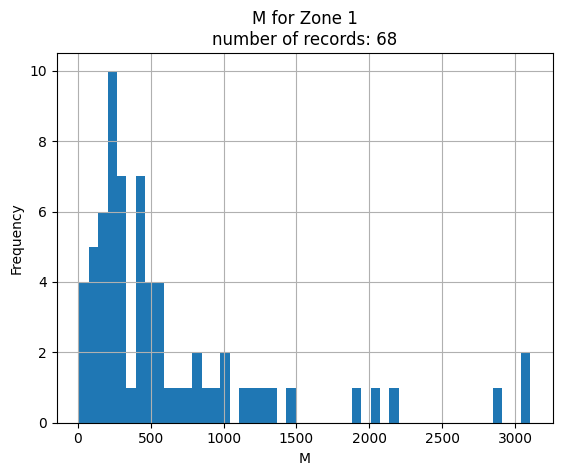

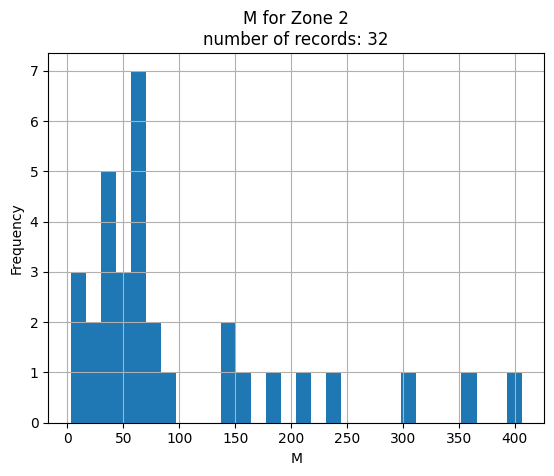

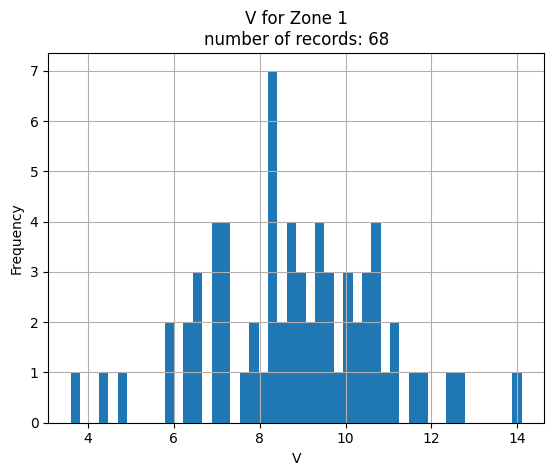

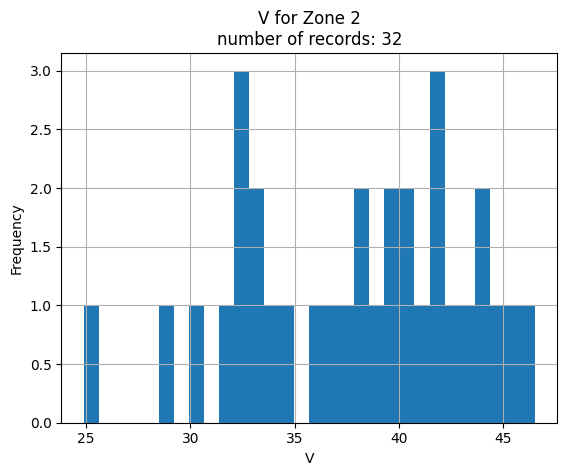

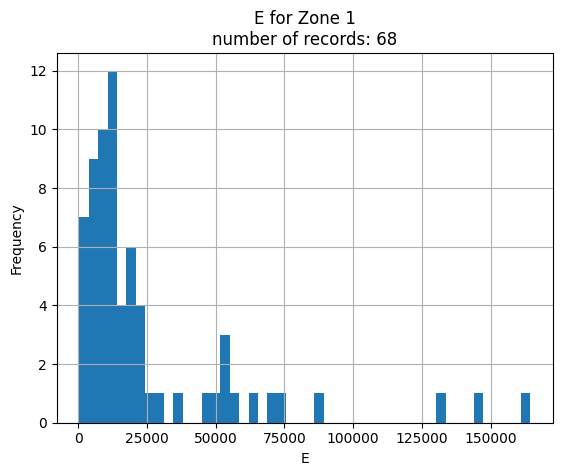

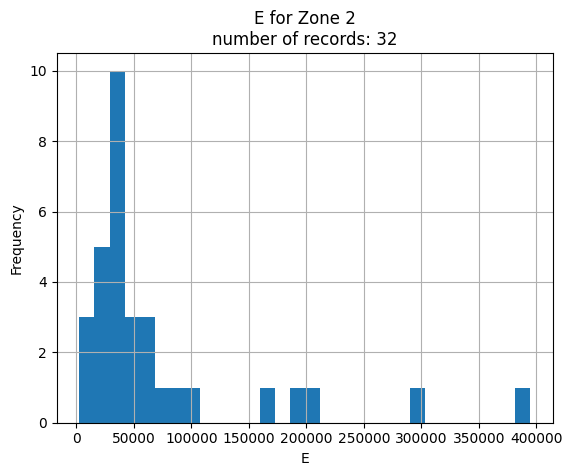

In [9]:
for col in ["m", "v", "e"]:
    for zone in [1, 2]:
        plot_histogram(df[df["zone"] == zone], col, zone)

# Fit Distributions

In [10]:
fit = best_distributions(df)

Fitting 12 distributions:   0%|          | 0/12 [00:00<?, ?it/s]SKIPPED poison distribution (taking more than 30 seconds)
SKIPPED standard_normal distribution (taking more than 30 seconds)
Fitting 12 distributions:  17%|█▋        | 2/12 [00:00<00:00, 18.01it/s]SKIPPED binomial distribution (taking more than 30 seconds)
SKIPPED chauchy distribution (taking more than 30 seconds)
Fitting 12 distributions:   0%|          | 0/12 [00:00<?, ?it/s]SKIPPED poison distribution (taking more than 30 seconds)
SKIPPED standard_normal distribution (taking more than 30 seconds)
SKIPPED binomial distribution (taking more than 30 seconds)
Fitting 12 distributions:   0%|          | 0/12 [00:00<?, ?it/s]SKIPPED poison distribution (taking more than 30 seconds)
SKIPPED standard_normal distribution (taking more than 30 seconds)
Fitting 12 distributions:  33%|███▎      | 4/12 [00:00<00:00, 31.44it/s]SKIPPED binomial distribution (taking more than 30 seconds)
SKIPPED chauchy distribution (taking more than 30 

# Mass Prediction

In [11]:
print_fit(fit, 1, "m")

parameters for each of the 5 best distributions:


expon: (12.0, 616.6323529411765)
pareto: (8.139957856906456, -4395.478359332771, 4407.47835933277)
weibull_min: (0.9106841716935778, 11.999999999999996, 629.0268620909127)
gamma: (0.8079614675149851, 11.999999999999998, 822.0119854583972)
norm: (628.6323529411765, 690.7489521060746)


              sumsquare_error          aic          bic  kl_div  ks_statistic   
expon               0.000019  1790.287904 -1019.387389     inf      0.112432  \
pareto              0.000019  1793.510126 -1013.956367     inf      0.098172   
weibull_min         0.000020  1770.510091 -1009.641018     inf      0.115620   
gamma               0.000021  1765.999570 -1005.105427     inf      0.117606   
norm                0.000028  1843.326893  -990.168909     inf      0.241431   

             ks_pvalue  
expon         0.331307  
pareto        0.497865  
weibull_min   0.299742  
gamma         0.281179  
norm          0.000566  


In [12]:
print_fit(fit, 2, "m")

parameters for each of the 5 best distributions:


expon: (3.0, 98.0625)
pareto: (23.402211222123196, -2194.4059323972465, 2197.405932397246)
gamma: (0.9381474241389681, 2.999999999999999, 105.02431901263665)
weibull_min: (0.9266230724032574, 2.999999999999999, 94.5448391798489)
beta: (0.5724005864569492, 2.0033812481819653, 2.9999999999999996, 458.71842940621747)


              sumsquare_error          aic         bic  kl_div  ks_statistic   
expon               0.002070  1332.083403 -301.742318     inf      0.157689  \
pareto              0.002073  1336.876630 -298.227328     inf      0.148151   
gamma               0.002088  1332.656086 -298.001909     inf      0.151540   
weibull_min         0.002109  1335.541057 -297.681933     inf      0.138226   
beta                0.002281  1300.418489 -291.702628     inf      0.173127   

             ks_pvalue  
expon         0.365264  
pareto        0.441318  
gamma         0.413322  
weibull_min   0.528741  
beta          0.261171  


In [13]:
print_fit(fit, 1, "v")

parameters for each of the 5 best distributions:


beta: (4563804.120538259, 371.6028429341918, -467461.8381287935, 467508.69181698083)
norm: (8.788235294117646, 1.9745088303442118)
weibull_min: (4.079735261517415, 1.5458869434704043, 7.971005972579101)
lognorm: (0.0076789319250212, -247.89516201765224, 256.6759418651161)
gamma: (808.5274464550948, -47.62228137985407, 0.06977057532501355)


              sumsquare_error         aic         bic  kl_div  ks_statistic   
beta                1.004818  564.778592 -269.721665     inf      0.052946  \
norm                1.007418  559.582300 -277.984954     inf      0.059355   
weibull_min         1.008017  558.267266 -273.724997     inf      0.056877   
lognorm             1.008072  561.995251 -273.721325     inf      0.060469   
gamma               1.010142  560.352868 -273.581846     inf      0.063807   

             ks_pvalue  
beta          0.985868  
norm          0.958730  
weibull_min   0.971498  
lognorm       0.951994  
gamma      

In [14]:
print_fit(fit, 2, "v")

parameters for each of the 5 best distributions:


beta: (2.135456049863241, 1.2827668923945292, 23.092130432299154, 23.56888476645474)
weibull_min: (8.638735030087028, -0.22617420918062914, 40.2783815049829)
norm: (37.790625, 5.31080027956004)
lognorm: (0.00623840856784791, -816.6351186470495, 854.4026875493)
gamma: (320.7768019244197, -58.46253026672059, 0.2999179507099794)


              sumsquare_error         aic         bic  kl_div  ks_statistic   
beta                0.590531  648.128803 -113.896088     inf      0.074197  \
weibull_min         0.599858  673.733908 -116.860360     inf      0.113961   
norm                0.607154  675.068739 -119.939229     inf      0.104641   
lognorm             0.607272  676.904694 -116.467247     inf      0.105850   
gamma               0.608798  677.225194 -116.386964     inf      0.113424   

             ks_pvalue  
beta          0.989000  
weibull_min   0.758155  
norm          0.839121  
lognorm       0.829241  
gamma         0.763071  

In [15]:
print_fit(fit, 1, "e")

parameters for each of the 5 best distributions:


lognorm: (1.0474041303558448, -380.63786381920573, 14630.35739041989)
expon: (464.6400000000001, 24733.1205882353)
pareto: (3.6215531505044236, -64845.05068678005, 65309.69068678005)
gamma: (0.9558872559200986, 464.64000000000004, 26086.529225385282)
beta: (0.8286590472544553, 71.07056650487297, 464.64000000000004, 2078680.131494307)


          sumsquare_error          aic          bic  kl_div  ks_statistic   
lognorm     4.593815e-09  2676.091884 -1579.769737     inf      0.092226  \
expon       5.372979e-09  2690.009776 -1573.335579     inf      0.169463   
pareto      5.403256e-09  2664.687913 -1568.733960     inf      0.105254   
gamma       5.461863e-09  2681.120483 -1568.000361     inf      0.167742   
beta        5.874057e-09  2682.649537 -1558.833471     inf      0.142314   

         ks_pvalue  
lognorm   0.577405  
expon     0.035486  
pareto    0.410204  
gamma     0.038475  
beta      0.115300  


In [16]:
print_fit(fit, 2, "e")

parameters for each of the 5 best distributions:


expon: (2683.9349999999995, 69859.77156250001)
pareto: (4.723657258500789, -258105.52782155178, 260789.46282155177)
gamma: (0.8734541624879755, 2683.934999999999, 75549.9668817301)
weibull_min: (0.8626892145330028, 2683.934999999999, 66803.16631028074)
beta: (0.4692992017689597, 0.9228773844581817, 2683.934999999999, 398125.9088800909)


              sumsquare_error          aic         bic  kl_div  ks_statistic   
expon           2.040629e-09  2796.134159 -744.292323     inf      0.197949  \
pareto          2.103830e-09  2794.284487 -739.850541     inf      0.157798   
gamma           2.140822e-09  2805.397941 -739.292770     inf      0.163984   
weibull_min     2.209082e-09  2772.951891 -738.288380     inf      0.173080   
beta            2.703023e-09  2625.839951 -728.365241     inf      0.368347   

             ks_pvalue  
expon         0.141915  
pareto        0.364442  
gamma         0.319919  
weibull_min   0.261452  
beta    

In [17]:
print_fit(fit, 1, "time_differences")

parameters for each of the 5 best distributions:


weibull_min: (0.8753455985098517, -1.945910271100519e-28, 17.874394733453897)
lognorm: (1.1028764391574057, -0.9452333735893894, 12.018500914324097)
gamma: (0.8197272446984147, -3.33884433330227e-23, 22.171343777368136)
pareto: (56735570.51423103, -1073741824.0, 1073741823.9999999)
expon: (0.0, 18.925373134328357)


              sumsquare_error         aic         bic  kl_div  ks_statistic   
weibull_min         0.054647  937.127819 -463.860497     inf      0.069187  \
lognorm             0.054928  957.932468 -463.516207     inf      0.089336   
gamma               0.055074  938.326866 -463.338184     inf      0.078670   
pareto              0.055109  926.987143 -463.296251     inf      0.096182   
expon               0.055109  924.987138 -467.500944     inf      0.096182   

             ks_pvalue  
weibull_min   0.883385  
lognorm       0.626266  
gamma         0.771663  
pareto        0.533224  
expon         0.533224  


In [18]:
print_fit(fit, 2, "time_differences")

parameters for each of the 5 best distributions:


gamma: (1.535881507011648, -0.753356378076194, 16.523646227541796)
beta: (4.7448492275213425, 5350685786006.559, -11.588408774917475, 39951322771036.42)
norm: (24.625, 20.338925119091225)
expon: (0.0, 24.625)
pareto: (43603729.73449455, -1073741824.0, 1073741823.9999999)


         sumsquare_error          aic         bic  kl_div  ks_statistic   
gamma          0.020776  1117.563761 -224.472550     inf      0.116445  \
beta           0.020892  1227.639110 -220.828465     inf      0.103669   
norm           0.021115  1257.059435 -227.420439     inf      0.115393   
expon          0.021601  1091.452945 -226.692578     inf      0.165322   
pareto         0.021601  1093.452947 -223.226842     inf      0.165322   

        ks_pvalue  
gamma    0.735149  
beta     0.846907  
norm     0.744944  
expon    0.310798  
pareto   0.310798  
